### Evidencia 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

#### 1. Selecciona dos imágenes distintas de tu computadora, cárgalas dentro del notebook y asígnalas a dos variables en Python usando OpenCV. Asegúrate de que sean de extensión .jpg, .jpeg o .png.

In [2]:
dog_img = cv.imread('perro.jpg')
cat_img = cv.imread('gato.jpg')

In [3]:
def display_image(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray')

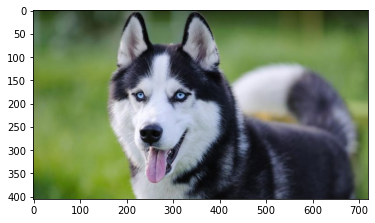

In [4]:
display_image(dog_img)

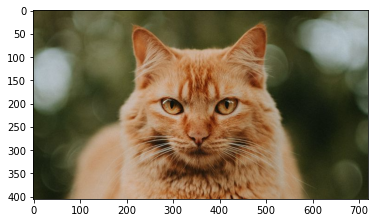

In [5]:
display_image(cat_img)

#### 2. Utilizando el método addWeighted en OpenCV, fusiona ambas imágenes con un valor de alpha de 30 y un valor de beta de 70 e imprime el resultado final.

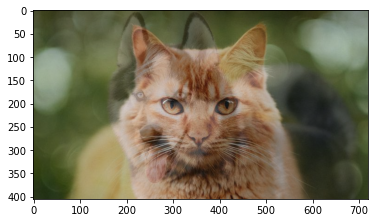

In [6]:
imagen_final = cv.addWeighted(src1=dog_img,alpha=0.3,src2=cat_img,beta=0.7,gamma=0)
display_image(imagen_final)

#### 3. Describe lo que hace el método addWeighted y cómo sus parámetros afectan al resultado final.

El metodo addWeighted permite unir dos imágenes en una sola, agregando un peso a cada imagen. Los pesos son especificados a través de los parámetros alpha (peso de la primera imagen) y beta (peso de la segunda imagen). El valor de los pesos generalmente es en un rango de 0 - 1. Cuando el valor del peso es muy pequeño o cercano a cero la imagen se ve más traslucida, mientras que cuando el valor del peso es más grande o cercano a 1 la imagen se ve más nítida.

#### 4. Selecciona una de las imágenes anteriores y modifica su contraste y brillo utilizando NumPy e imprime el resultado final.

In [7]:
def brillo_contraste(image, brillo=0, contraste=1.0):
    # new_image(i,j) = contraste*image(i,j) + brillo
    new_image = np.zeros(image.shape, image.dtype)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            for c in range(image.shape[2]):
                new_image[y,x,c] = np.clip(contraste*image[y,x,c] + brillo, 0, 255)
    return new_image

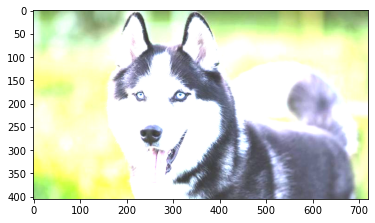

In [8]:
dog_2_img = brillo_contraste(dog_img, 50, 2.0)
display_image(dog_2_img)

#### 5. Explica la diferencia entre brillo y contraste en términos de la transformación realizada en el punto anterior.

El brillo es la propiedad de una imagen que nos permite ver con mayor claridad los objetos, mientras que el contraste es la diferencia de intensidad de luz que hay entre los tonos claros y obscuros de una imagen. 

En términos de la trasformación realizada en el punto anterior, cuando se aporta más brillo a una imagen básicamente se está aumentando (sumando) valor al pixel para acercarlo a un tono más claro (proximo a 255). Por otra parte, cuando se aumenta el contraste en una imagen se está aumentando la relacion que hay entre los pixeles claro y obscuros, al aumentar esta relación se está oscureciendo mas las sombras y las tonalidades obscuras, mientras que las tonalidades claras se hacen mas claras, esto se logra por medio de la multiplicación de una constante por el valor del pixel, esta multiplicacion hace que para valores muy grandes del pixel aumente considerablemente a comparacion de los valores pequeños del pixel, aumentando la diferencia entre ambos.

#### 6. Selecciona una de las imágenes del punto 1 y suavízala aplicando filtros medio, Gaussiano y bilateral, e imprime el resultado final.

In [9]:
from scipy import ndimage

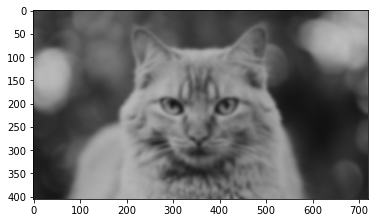

In [10]:
# FILTRO GAUSSIANO
cat_img_gray = cv.cvtColor(cat_img, cv.COLOR_BGR2GRAY)
img_res = ndimage.gaussian_filter(cat_img_gray, sigma=3)
display_image(img_res)

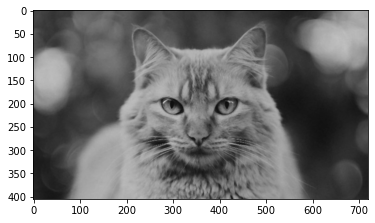

In [11]:
# FILTRO MEDIO
img_res = ndimage.median_filter(cat_img_gray, 3)
display_image(img_res)

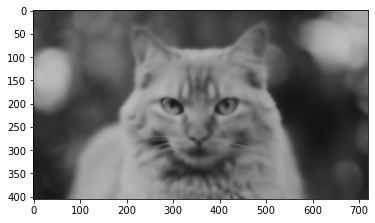

In [12]:
# FILTRO BILATERAL
img_res = cv.bilateralFilter(cat_img_gray, 15, 75, 75)
display_image(img_res)

#### 7. Explica los resultados obtenidos del punto anterior.

**Filtro Gaussiano**  
Elimina el ruido de la imagen, la imagen resultante se ve borrosa dependiendo del sigma aplicado.

**Filtro Medio**  
Le quita el ruido a la imagen preservando mejor los bordes, la imagen se ve levemente borrosa.

**Filtro Bilateral**  
Al igual que el filtro medio tambien es usado para reducir el ruido en la imagen preservando mejor los bordes, pero la imagen se ve mas borrosa que el filtro medio.

#### 8. Selecciona una de las imágenes del punto 1 y modifícala usando erosión y dilatación. Utiliza tres tipos diferentes de kernel: MORPH_RECT, MORPH_CROSS y MORPH_ELLIPSE

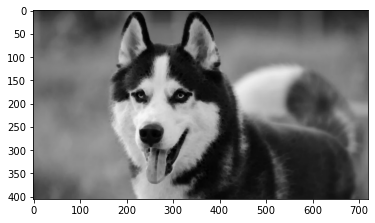

In [14]:
dog_img_gray = cv.cvtColor(dog_img, cv.COLOR_BGR2GRAY)

# EROSION - MORPH_RECT
kernel = cv.getStructuringElement(cv.MORPH_RECT, (4, 4))
img_res = cv.erode(dog_img_gray.copy(), kernel, iterations = 1)
display_image(img_res)

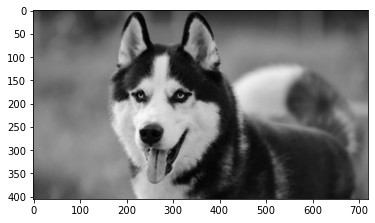

In [15]:
# EROSION - MORPH_CROSS
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (4, 4))
img_res = cv.erode(dog_img_gray.copy(), kernel, iterations = 1)
display_image(img_res)

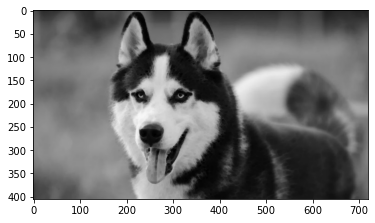

In [16]:
# EROSION - MORPH_ELLIPSE
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (4, 4))
img_res = cv.erode(dog_img_gray.copy(), kernel, iterations = 1)
display_image(img_res)

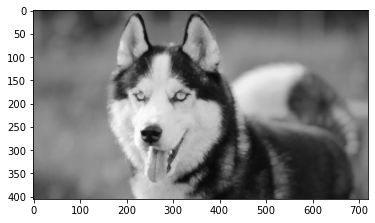

In [17]:
# DILATACION - MORPH_RECT
kernel = cv.getStructuringElement(cv.MORPH_RECT, (4, 4))
img_res = cv.dilate(dog_img_gray.copy(), kernel, iterations = 1)
display_image(img_res)

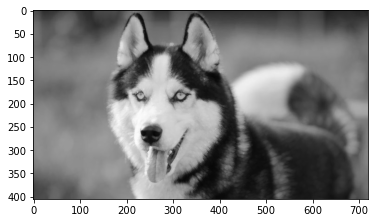

In [18]:
# DILATACION - MORPH_CROSS
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (4, 4))
img_res = cv.dilate(dog_img_gray.copy(), kernel, iterations = 1)
display_image(img_res)

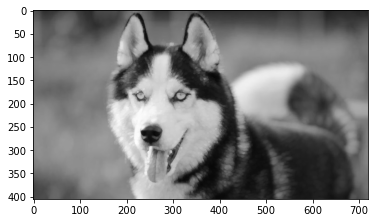

In [19]:
# DILATACION - MORPH_ELLIPSE
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (4, 4))
img_res = cv.dilate(dog_img_gray.copy(), kernel, iterations = 1)
display_image(img_res)

#### 9. Explica el efecto del uso de los diferentes kernels en las dos operaciones del punto anterior.

**Erosion:** Adelgaza ciertas areas de la imagen para eliminar el ruido. Se eliminan lineas finas quedando solo los objetos claves de la imagen.


**Dilatacion:** Expande ciertas regiones de la imagen para eliminar el ruido. Hace que los objetos sean mas visibles, las lineas parecen mas agruesas

Los tipos de kernels (MORPH_RECT, MORPH_CROSS y MORPH_ELLIPSE) definen la forma que va a tener el kernel que posteriormente se pasa a la erosion o la dilatacion, por ejemplo MORPH_RECT es un kernel donde todos sus elementos son 1's; MORPH_CROSS es un kernel que esta formado por una cruz de 1's, siendo los demas elementos 0's; MORPH_ELLIPSE es un kernel que tiene la forma de un elipse de 1's y sus demas elementos 0's.

Al aplicar los diferentes kernels se pueden ver diversos efectos, por ejemplo se potencian algunas formas o se pierde un poco la sensación de profundidad si se observa el hocico del perro.
